# Importando base de dados

In [129]:
import pandas as pd

In [130]:
dados = pd.read_csv('dados/tips.csv')

In [131]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Traduzindo Columns e Campos


In [132]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [133]:
renomear = {
    'total_bill' : 'valor_da_conta',
    'tip' : 'gorjetas',
    'dessert' : 'sobremesa',
    'day' : 'dia_da_semana',
    'time' : 'hora_do_dia',
    'size' : 'total_de_pessoas'
}

In [134]:
type(dados)

pandas.core.frame.DataFrame

In [135]:
gorjetas = dados.rename(columns = renomear)

In [136]:
gorjetas.head(1)

,valor_da_conta,gorjetas,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [137]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [138]:
sim_nao = {
    'No' : 'Não',
    'Yes' : 'Sim'
}

In [139]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [140]:
gorjetas.head(1)

,valor_da_conta,gorjetas,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [141]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [142]:
gorjetas.head(1)

,valor_da_conta,gorjetas,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [143]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [144]:
dias = {
    'Sun' : 'Domingo',
    'Sat' : 'Sábado',
    'Thur' : 'Quinta',
    'Fri' : 'Sexta'
}

In [145]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [146]:
gorjetas.head(1)

,valor_da_conta,gorjetas,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [147]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [148]:
hora = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [149]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [150]:
gorjetas.head(1)

,valor_da_conta,gorjetas,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [151]:
gorjetas.head()

,valor_da_conta,gorjetas,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


# Importando o Seaborn

In [152]:
import seaborn as sns

In [153]:
!pip show seaborn

Name: seaborn
Version: 0.10.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: c:\users\pc\anaconda3\lib\site-packages
Requires: matplotlib, pandas, scipy, numpy
Required-by: 


# Análise 1 - Valor da conta e gorjeta

In [154]:
gorjetas.columns

Index(['valor_da_conta', 'gorjetas', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

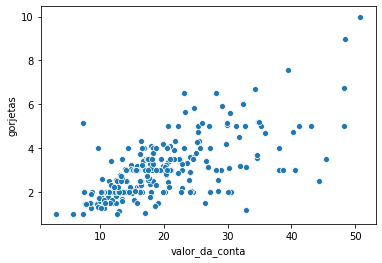

In [155]:
valor_gorjetas = sns.scatterplot(x = 'valor_da_conta', y = 'gorjetas', data = gorjetas)

 Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta

In [156]:
print(f'A base de dados contém {gorjetas.shape[0]} registros \n')
print('Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros 

Registros não nulos


valor_da_conta      244
gorjetas            244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [157]:
gorjetas.head(1)

,valor_da_conta,gorjetas,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [158]:
gorjetas['porcentagem'] = gorjetas['gorjetas'] / gorjetas['valor_da_conta']

In [159]:
gorjetas.head()

,valor_da_conta,gorjetas,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [160]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [161]:
gorjetas.head(3)

,valor_da_conta,gorjetas,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17


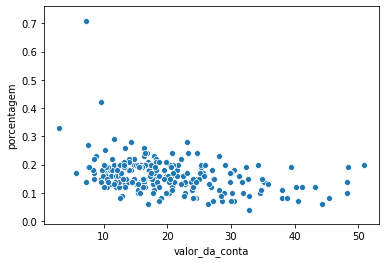

In [162]:
porcentagem_conta = sns.scatterplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

Visualmente, o valor da conta não é proporcional ao valor da gorjeta

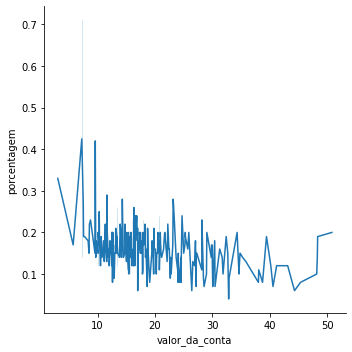

In [163]:
porcentagem_conta_linha = sns.relplot(x = 'valor_da_conta', y = 'porcentagem', kind = 'line', data = gorjetas)

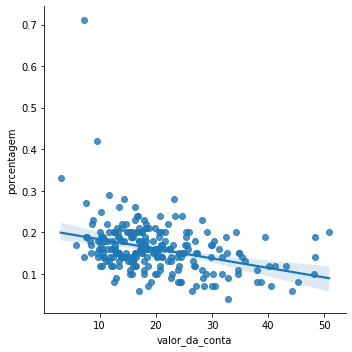

In [164]:
sns.lmplot(x = 'valor_da_conta', y = 'porcentagem', data = gorjetas)

# Análise 2 - Sobremesa

In [165]:
gorjetas.head()

,valor_da_conta,gorjetas,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [166]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_da_conta,gorjetas,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [167]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_da_conta,gorjetas,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


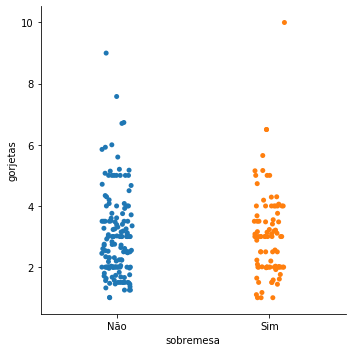

In [168]:
sns.catplot(x='sobremesa', y='gorjetas', data=gorjetas)

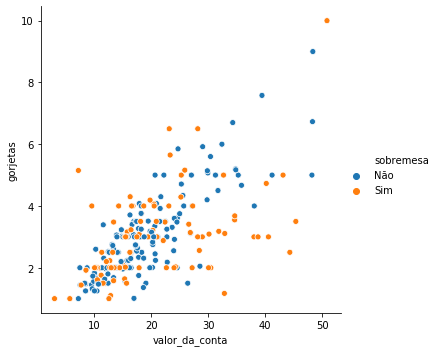

In [169]:
sns.relplot(x='valor_da_conta', y='gorjetas', hue='sobremesa', data=gorjetas)

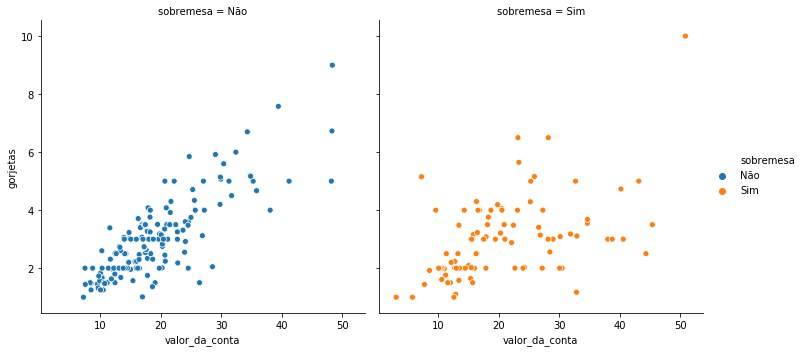

In [170]:
sns.relplot(x='valor_da_conta', y='gorjetas', hue='sobremesa', col='sobremesa', data=gorjetas)

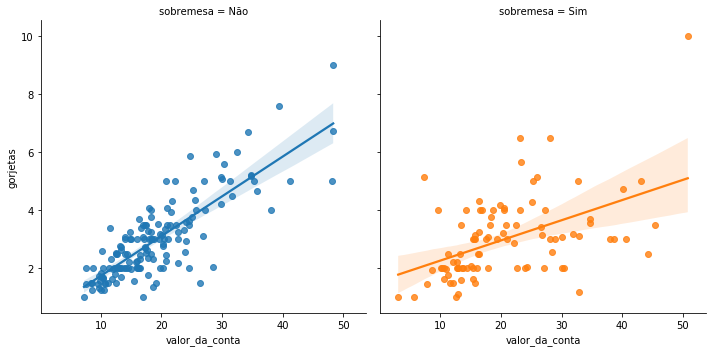

In [171]:
sns.lmplot(x='valor_da_conta', y='gorjetas', hue='sobremesa', col='sobremesa', data=gorjetas)

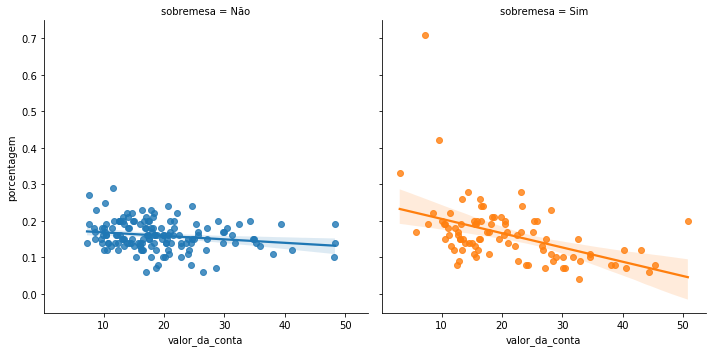

In [172]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='sobremesa', col='sobremesa', data=gorjetas)

Visualmente, exite uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa

# Teste de Hipótese

H<sup>null</sup>

A distribuição da taxa da gorjeta é a mesma nos dois grupos

H<sup>alt</sup>

A distribuição da taxa a gorjeta não é a mesma nos dois grupos

In [173]:
from scipy.stats import ranksums

In [174]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [175]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [176]:
sem_sobremesa

0      0.06
1      0.16
2      0.17
3      0.14
4      0.15
       ... 
235    0.12
238    0.13
239    0.20
242    0.10
243    0.16
Name: porcentagem, Length: 151, dtype: float64

In [177]:
r = ranksums(sobremesa, sem_sobremesa)

In [178]:
print(f'O valor do p-value é {r.pvalue}')

O valor do p-value é 0.5266635660124415


# Análise 3 - Dias da Semana

In [179]:
gorjetas.head()

,valor_da_conta,gorjetas,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [180]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

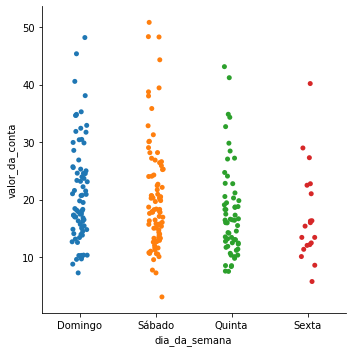

In [181]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

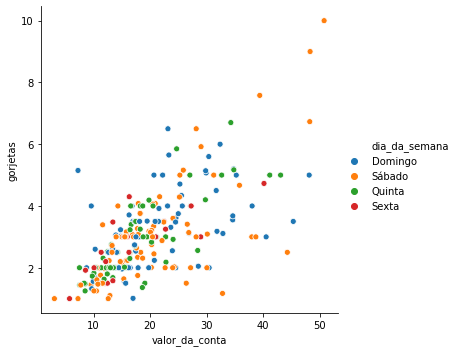

In [182]:
sns.relplot(x='valor_da_conta', y='gorjetas', hue='dia_da_semana', data=gorjetas)

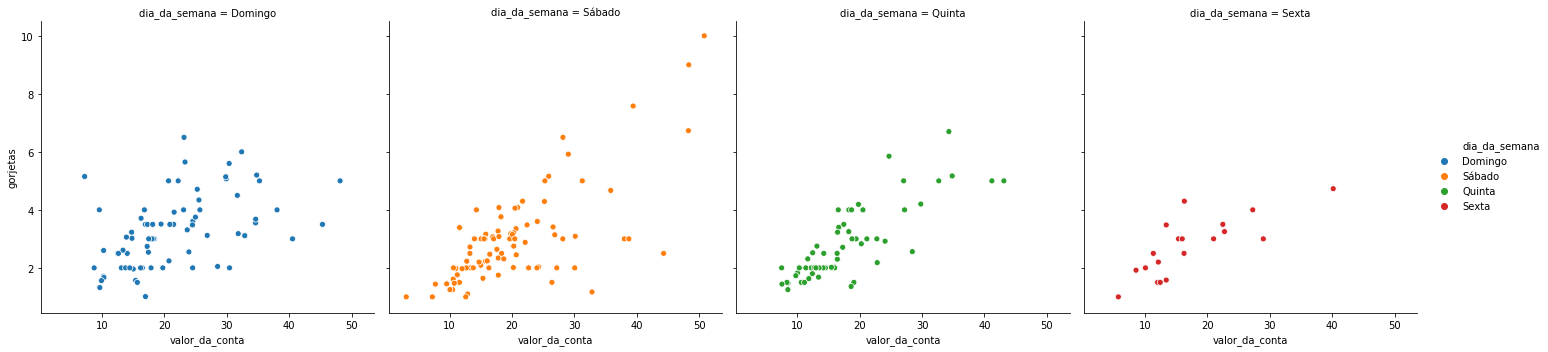

In [183]:
sns.relplot(x='valor_da_conta', y='gorjetas', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

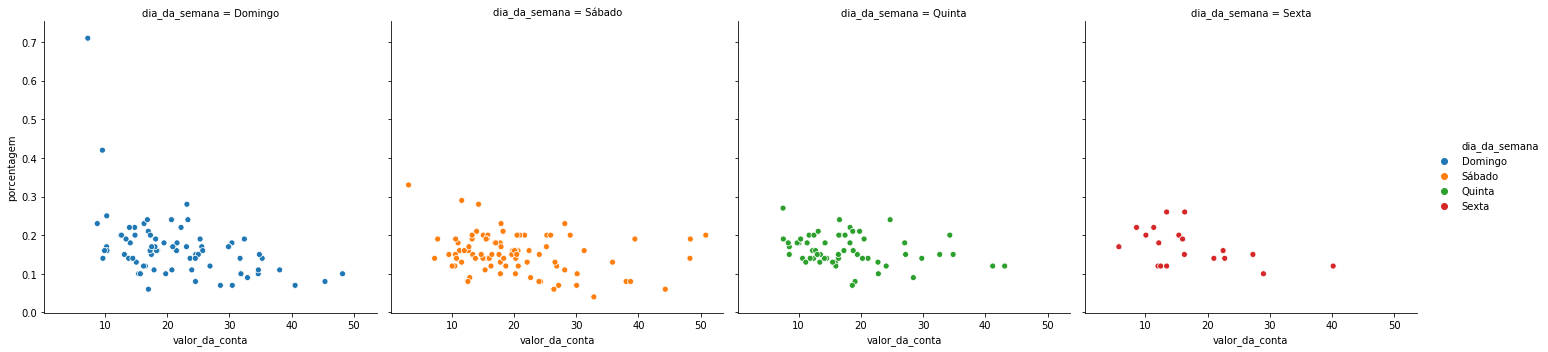

In [184]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

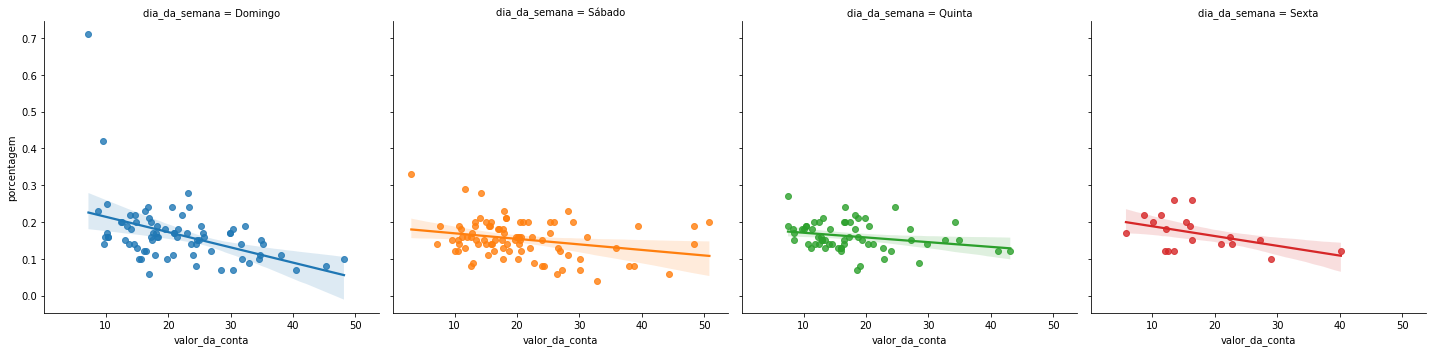

In [185]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

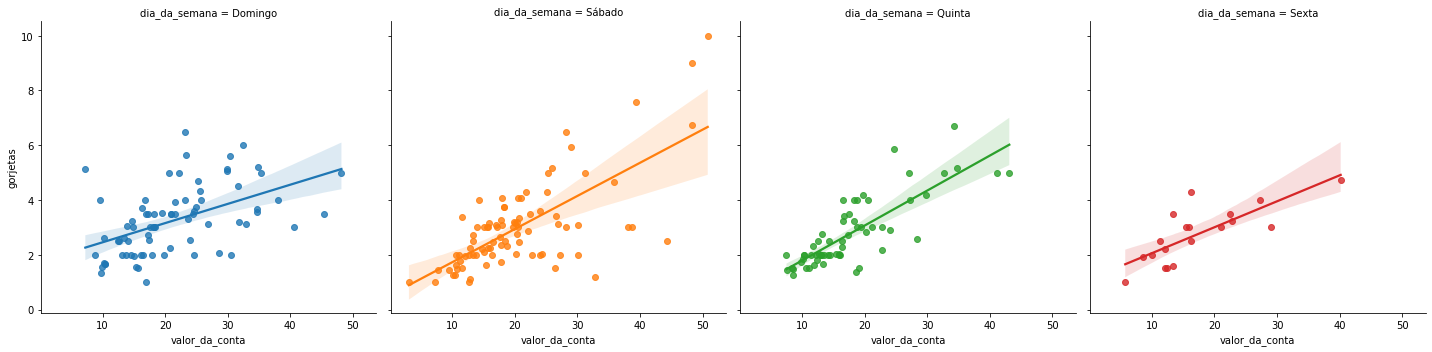

In [186]:
sns.lmplot(x='valor_da_conta', y='gorjetas', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [188]:
media_geral_gorjetas = gorjetas.gorjetas.mean()

In [197]:
print(f'A média geral das gorjetas é de {media_geral_gorjetas}')

A média geral das gorjetas é de 2.9982786885245902


In [194]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjetas', 'porcentagem']]

,valor_da_conta,gorjetas,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [195]:
gorjetas.dia_da_semana.value_counts()

Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de Hipótese

H<sup>null</sup>

A distribuição do valor da conta é igual no sábado e no domingo

H<sup>alt</sup>

A distribuição do valor da conta não é igual no sábado e no domingo 

In [201]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [202]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [204]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)

In [206]:
print(f'O valor de p-value é {r2.pvalue}')

O valor de p-value é 0.3576728477868443


# Análise 4 - Hora do dia

In [207]:
gorjetas.head()

,valor_da_conta,gorjetas,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [208]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

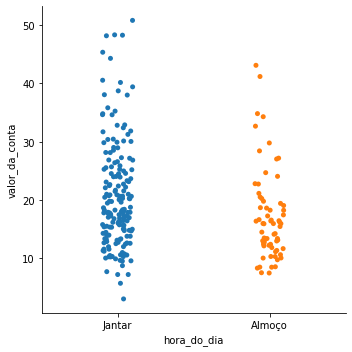

In [209]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

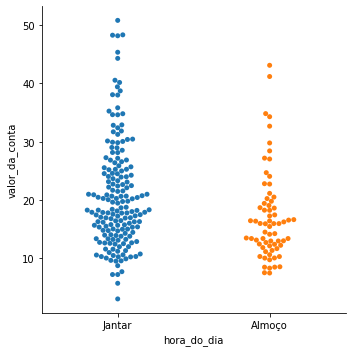

In [210]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm', data=gorjetas)

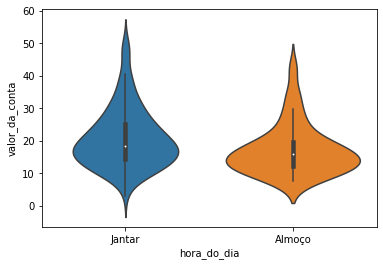

In [212]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

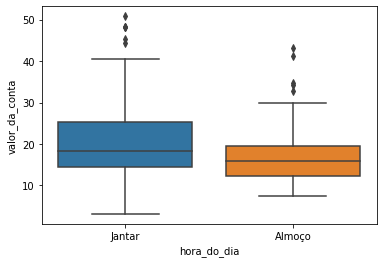

In [213]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [215]:
almoço = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

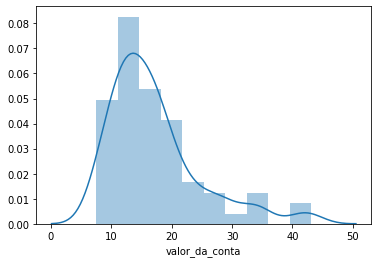

In [217]:
sns.distplot(almoço)

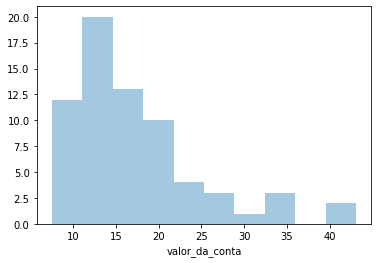

In [218]:
sns.distplot(almoço, kde= False)

In [221]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

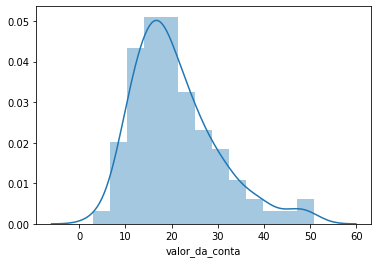

In [222]:
sns.distplot(jantar)

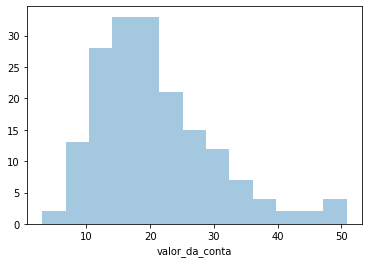

In [223]:
sns.distplot(jantar, kde=False)

## Teste de Hipótese

H<sup>null</sup>

A distribuição do valor da conta é igual no jantar e no almoço

H<sup>alt</sup>

A distribuição do valor da conta não é igual no jantar e no almoço

In [226]:
r2 = ranksums(jantar, almoço)

H<sup>alt</sup>

A distribuição do valor da conta não é igual no jantar e no almoço

## Teste de Hipótese 2

H<sup>null</sup>

A distribuição da taxa da gorjeta é igual no jantar e no almoço

H<sup>alt</sup>

A distribuição da taxa da gorjeta não é igual no jantar e no almoço

In [228]:
porcentagem_almoço = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [229]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [232]:
r3 = ranksums(porcentagem_jantar, porcentagem_almoço)
print(f'O valor do p-value é {r3.pvalue}')

O valor do p-value é 0.2602493995587126


H<sup>null</sup>

A distribuição da taxa da gorjeta é igual no jantar e no almoço